<a href="https://colab.research.google.com/github/Shubham-naik-ai/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [162]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po


import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/AlmaBetter/UnSupervisedML/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
#Loading the Dataset
train_df = pd.read_csv(working_dir_path + 'NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv')

In [164]:
#Checking dimensions
train_df.shape

(7787, 12)

In [165]:
train_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [166]:
train_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [167]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [168]:
train_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [169]:
train_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [170]:
train_df.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [171]:
train_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [172]:
train_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [173]:
train_df['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [174]:
train_df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [175]:
train_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

# <b> Handling missing values

In [176]:
# Dropping null rows from 'date_added'

train_df.dropna(subset=['date_added'], inplace=True)

In [177]:
# Dropping null rows from 'rating'

train_df.dropna(subset=['rating'], inplace=True)

In [178]:
train_df.shape

(7770, 12)

In [179]:
# Correcting date format

train_df['date_added'] = pd.to_datetime(train_df['date_added'])


In [180]:
train_df['day_added'] = train_df['date_added'].dt.day
train_df['year_added'] = train_df['date_added'].dt.year
train_df['month_added']=train_df['date_added'].dt.month
train_df['year_added'].astype(int);
train_df['day_added'].astype(int);

In [181]:
train_df.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast             718
country          505
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
day_added          0
year_added         0
month_added        0
dtype: int64

In [182]:
train_df.fillna("No Data", inplace=True)
train_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
dtype: int64

Text(0.5, 1.0, 'Type of Netflix Content')

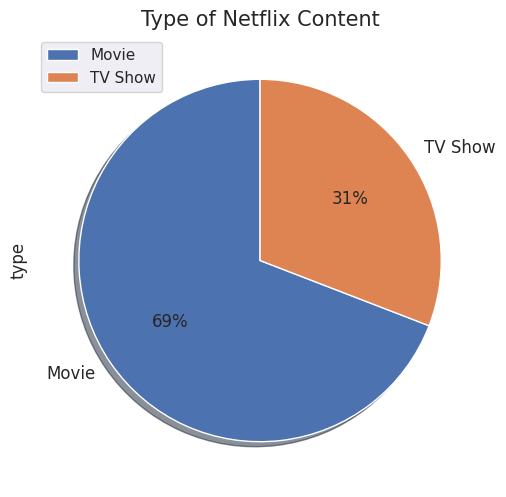

In [183]:
labels = ['Movie', 'TV show']
fig = plt.figure(figsize=(6,6), dpi=100)
train_df['type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=90, shadow = True, fontsize=12)
plt.legend()
plt.title('Type of Netflix Content', fontsize = 15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Rating')

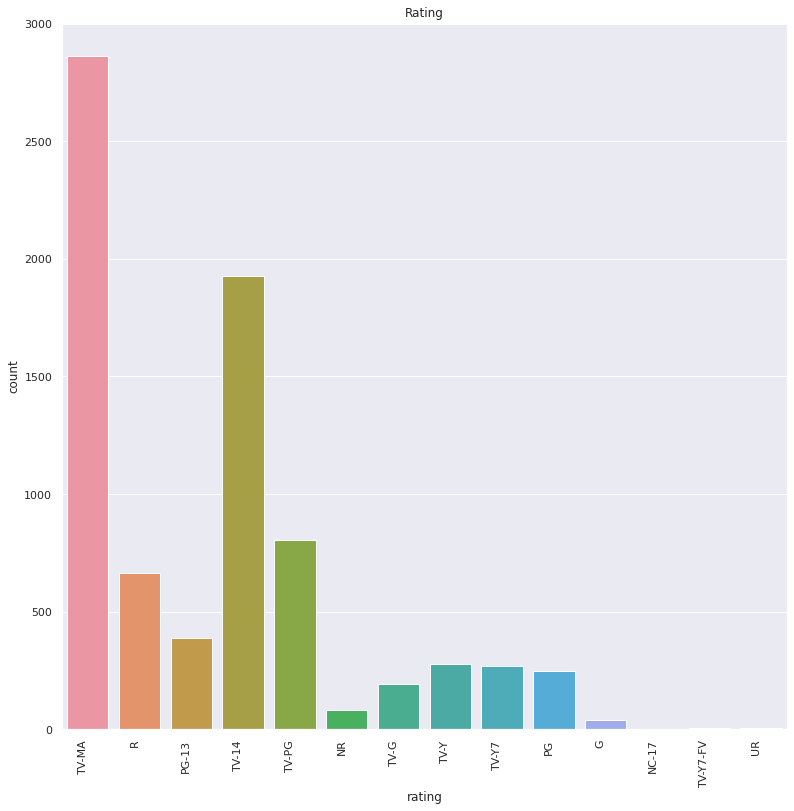

In [184]:
sns.countplot(train_df['rating'])
sns.countplot(train_df['rating']).set_xticklabels(sns.countplot(train_df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

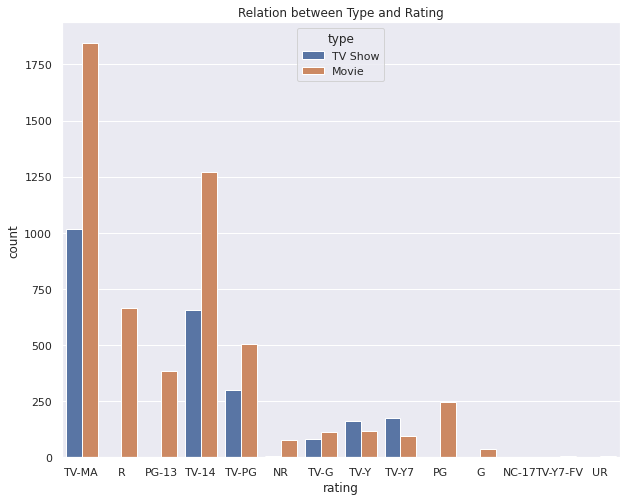

In [185]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=train_df)
plt.title('Relation between Type and Rating')
plt.show()

Almost 70% of the content on netflix are movies.

In [186]:
country_df = train_df['country'].value_counts().reset_index()
country_df = country_df[country_df['country'] /  country_df['country'].sum() > 0.01]

fig = px.pie(country_df, values='country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The majority of the content providers are in the above top-ten countries.

Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.

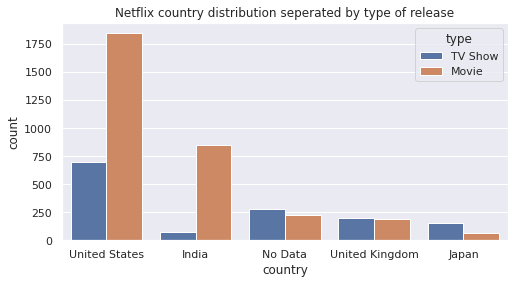

In [187]:
#Count of countries seperated by type of release

plt.figure(figsize = (8,4))
plt.title('Netflix country distribution seperated by type of release')
sns.countplot(x='country', data=train_df, hue='type', order=train_df.country.value_counts().iloc[:5].index)
plt.show()

In [188]:
train_df["year_added"] = train_df["date_added"].dt.year
train_df["year_added"].unique()

array([2020, 2016, 2018, 2017, 2019, 2021, 2015, 2013, 2011, 2012, 2014,
       2008, 2009, 2010])

In [189]:
# Plot growth of the contents over the years.

df = train_df.reset_index()
released_year_df = df.loc[df['release_year'] > 2000].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='red',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [190]:
df = train_df.reset_index()
added_year_df = df.loc[df['year_added'] > 2000].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='red',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

## **In which days do most movies and tv shows get added?**

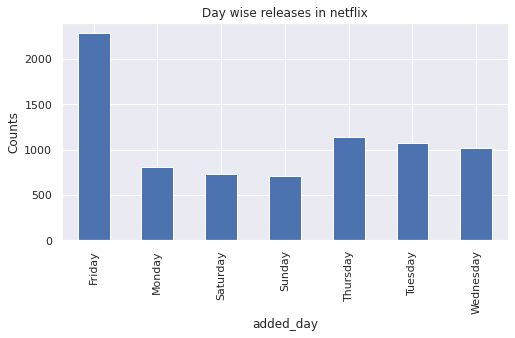

In [191]:
# Most of the shows are released on Fridays

train_df['added_day'] = train_df['date_added'].dt.day_name()

days_data = train_df[train_df['added_day'] != 'Data Not Available']
days_data =days_data.groupby('added_day')
days_data=days_data.size()
plt.figure(figsize = (8,4))
days_data.plot(kind="bar", y=["Type"])
plt.title('Day wise releases in netflix')
plt.ylabel('Counts')
plt.show()

Most of the shows are released on Fridays

## **In which month do most movies and tv shows get added?**

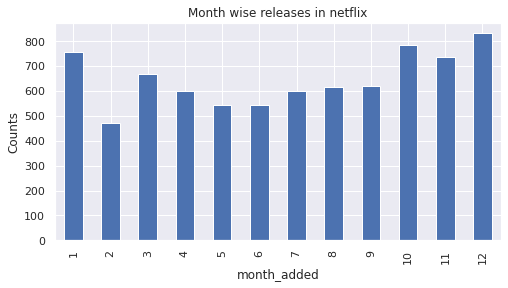

In [192]:

days_data = train_df[train_df['month_added'] != 'Data Not Available']
days_data =days_data.groupby('month_added')
days_data=days_data.size()
plt.figure(figsize = (8,4))
days_data.plot(kind="bar", y=["Type"])
plt.title('Month wise releases in netflix')
plt.ylabel('Counts')
plt.show()

## **In which Date do most movies and tv shows get added?**

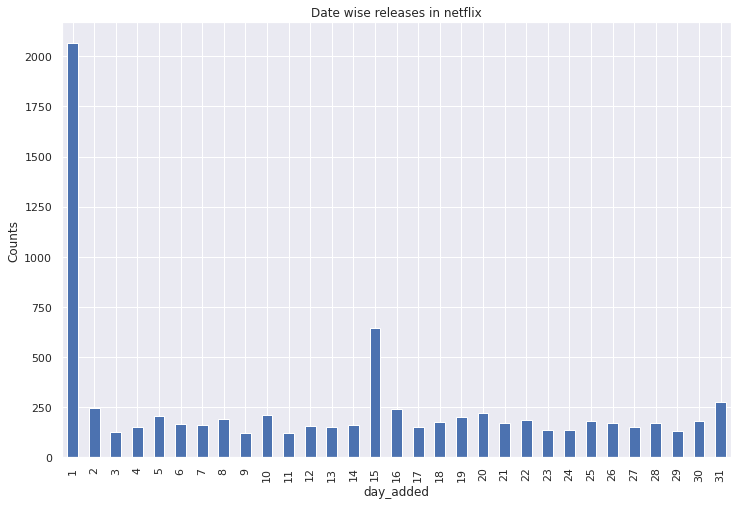

In [193]:

days_data = train_df[train_df['day_added'] != 'Data Not Available']
days_data =days_data.groupby('day_added')
days_data=days_data.size()
plt.figure(figsize = (12,8))
days_data.plot(kind="bar", y=["Type"])
plt.title('Date wise releases in netflix')
plt.ylabel('Counts')
plt.show()

Most of the content is uploaded at the beginning, middle, or the end of a month.

Which makes 1st, 15th or 31st of a month more prominent in getting new tv shows and movies.

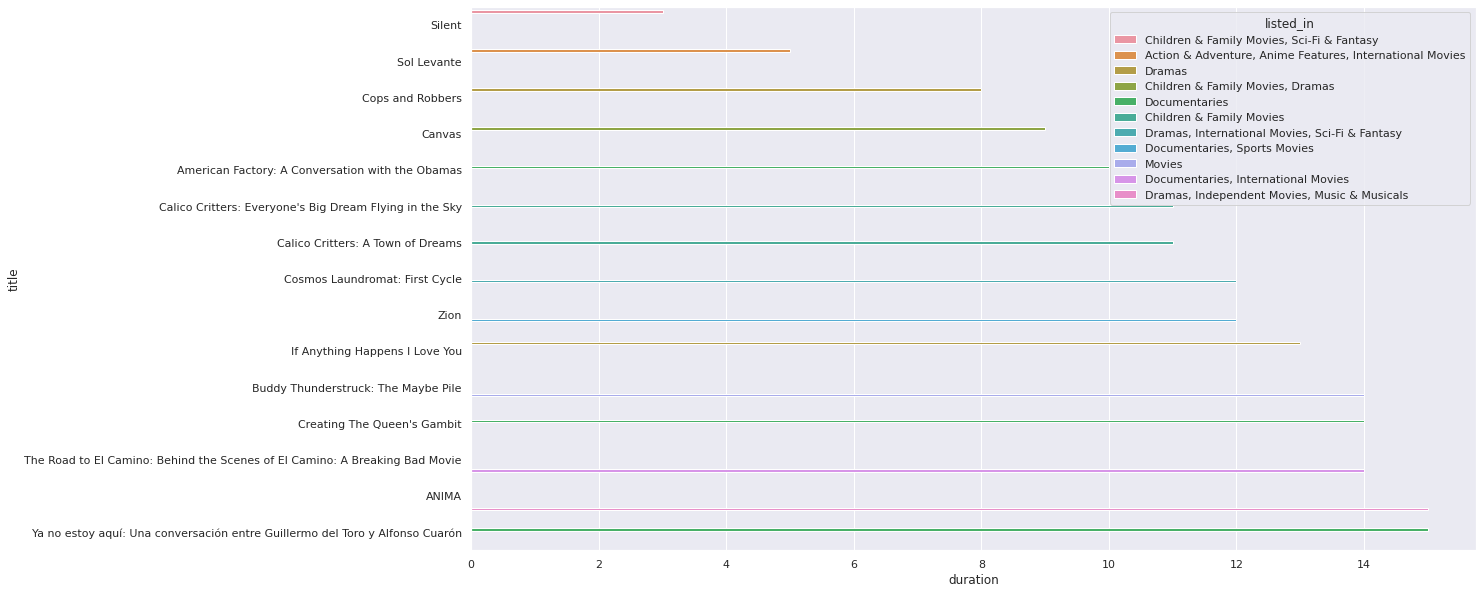

In [194]:
# Most of the children, sci-fi & Fantasy movies and documentaries take less amount of time

tmp_info = train_df.copy()
tmp_info = tmp_info[(tmp_info['type'] == 'Movie') & (tmp_info['duration'] != 'Data Not Available')]
tmp_info["duration"] = tmp_info["duration"].str.replace("min", "")
tmp_info['duration'] =tmp_info['duration'].astype(int)
tmp_info = tmp_info.sort_values(by='duration', ascending=True)[:15]
tmp_info.head()

plt.figure(figsize=(18,10))
sns.barplot(y='title', x='duration', data=tmp_info, hue='listed_in')
plt.show()

In [195]:
# Create subsets for tv shows and movies.
tv_shows = train_df[train_df['type'] == 'TV Show']
movies = train_df[train_df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

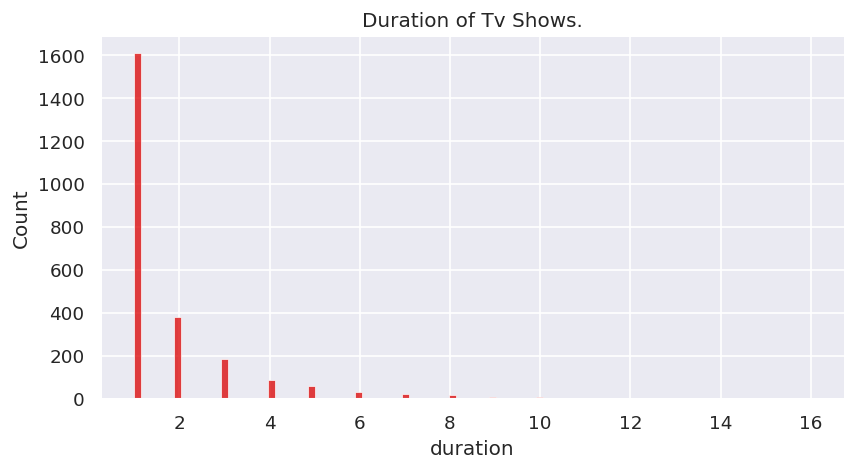

In [196]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.

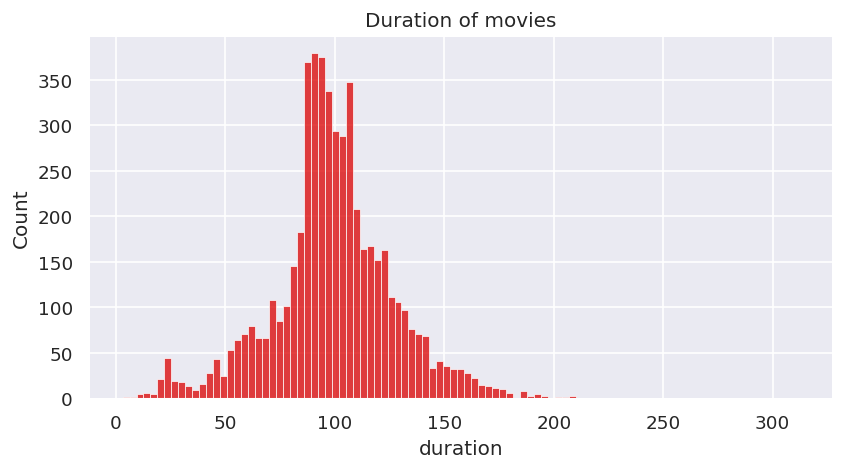

In [197]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

Most of the movies last for 90 to 120 minutes.

In [199]:
directors_list = train_df.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db0000', '#564d4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()
#fig.show('png')

## **Visualisation of Genre distribution**

In [200]:
train_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

Genres are reliant on the type of release (i.e. movie or tv show). Therefore, having a countplot is redundant. We can instead look at the top genres specific to each type of release.

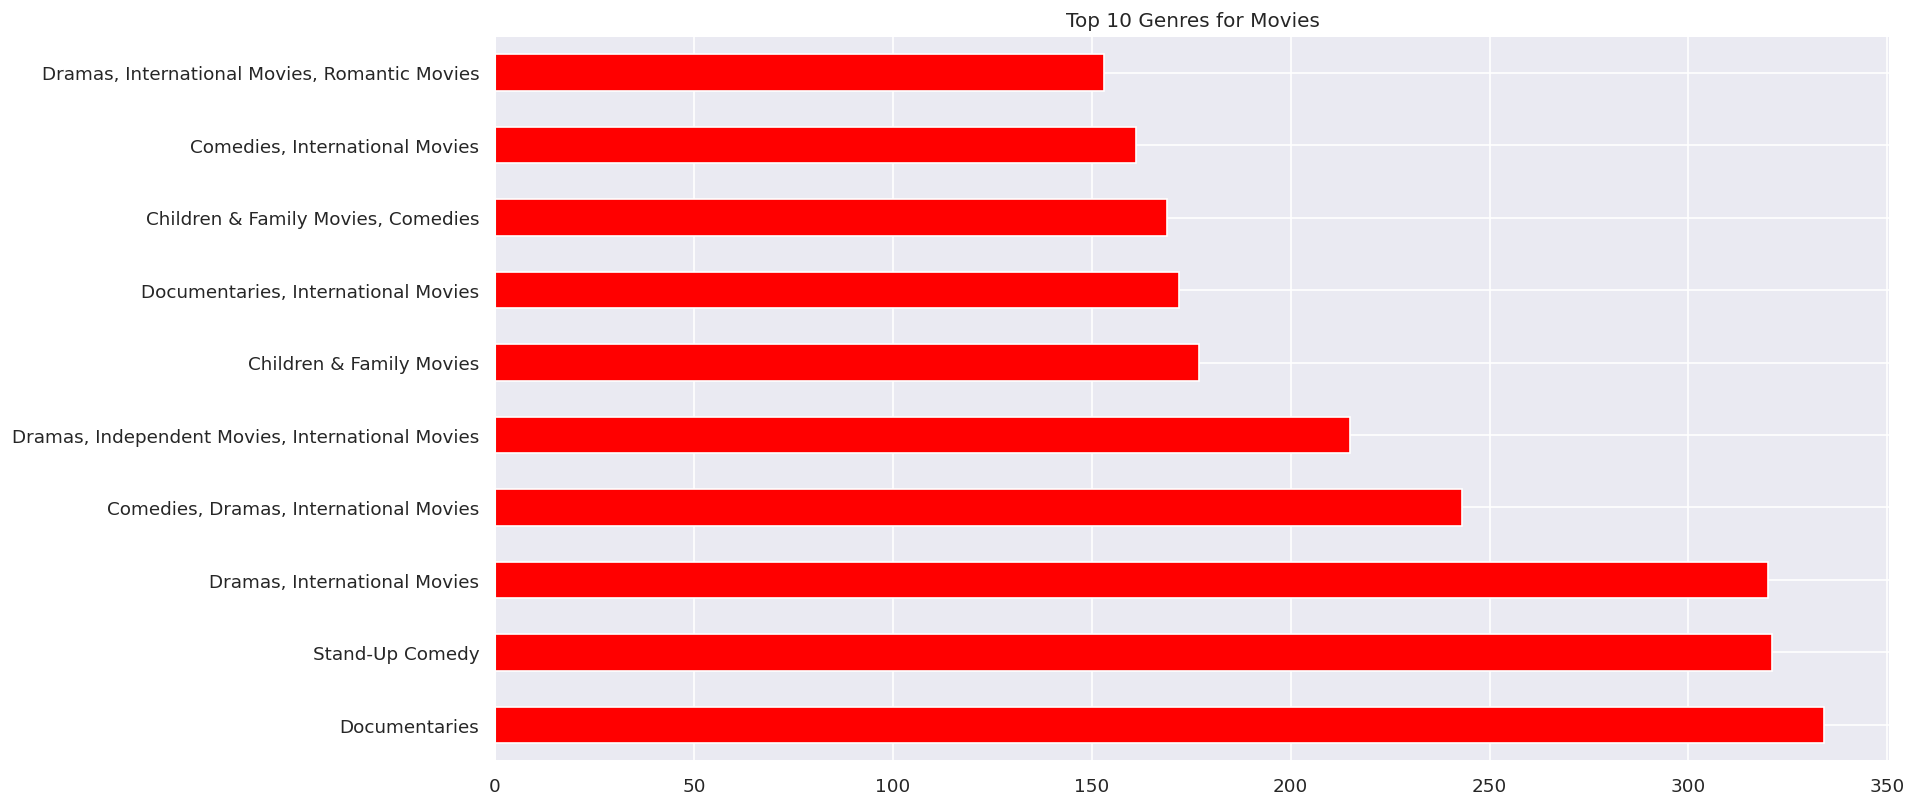

In [201]:
#Count of movie genres

plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for Movies')
train_df[train_df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind='barh', color='red')
plt.show()

Most common movie genre are International Dramas

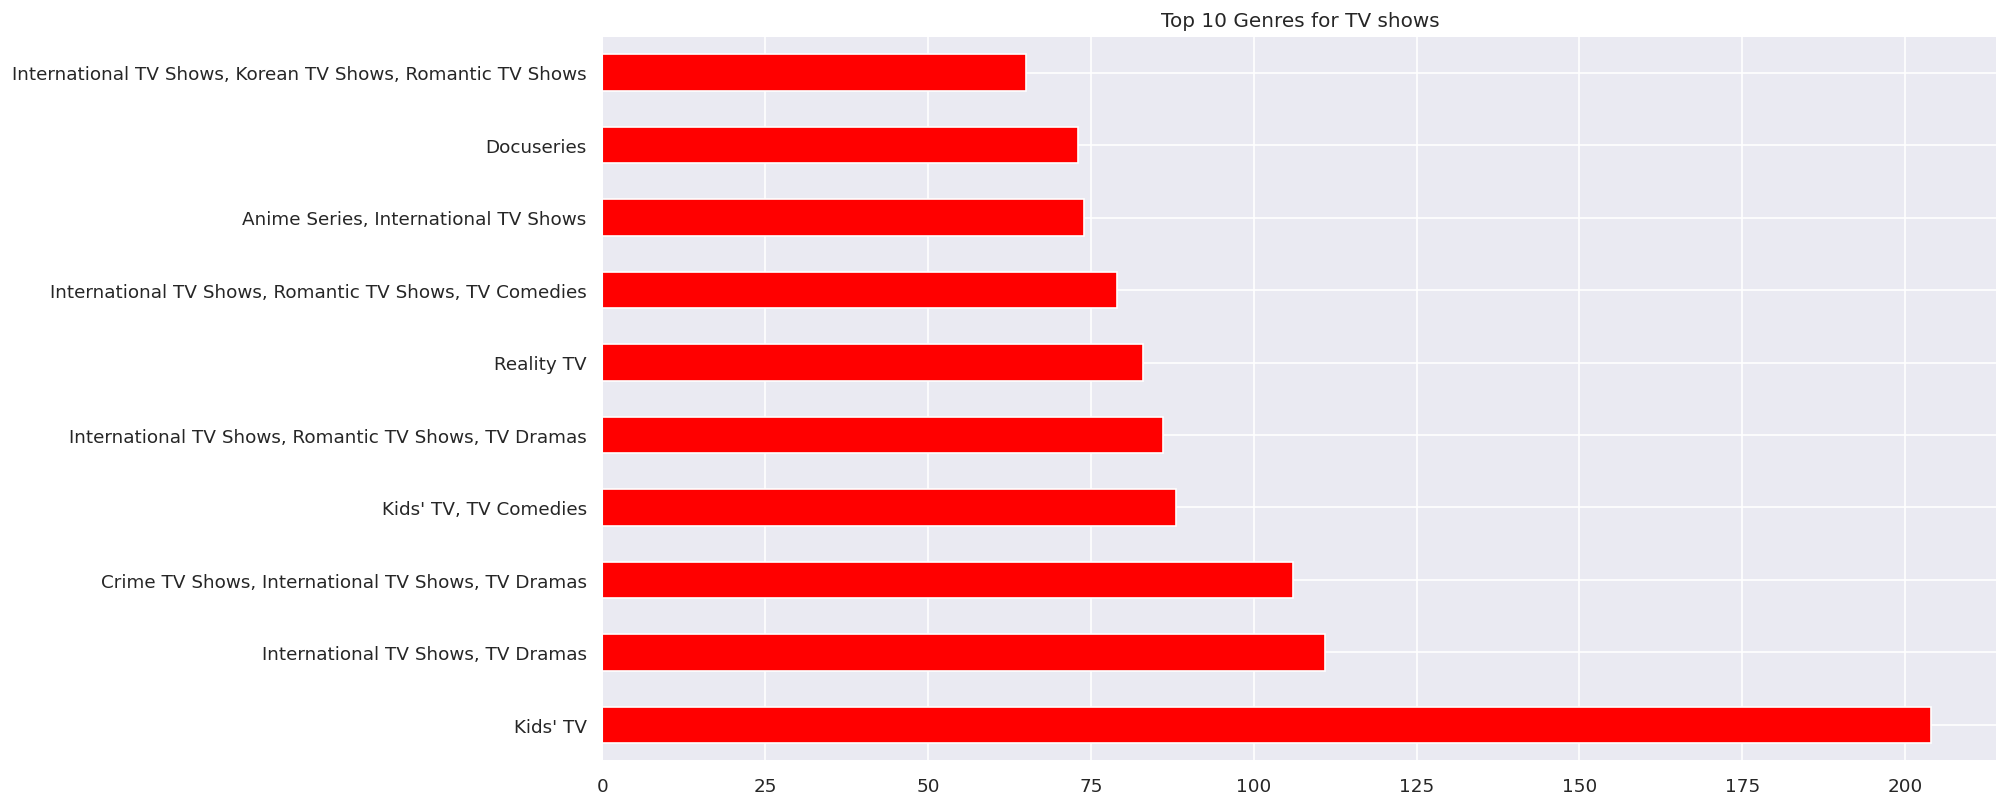

In [202]:
#Count of TV show genres

plt.figure(figsize = (15,8))
plt.title('Top 10 Genres for TV shows')
train_df[train_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind='barh', color='red')
plt.show()

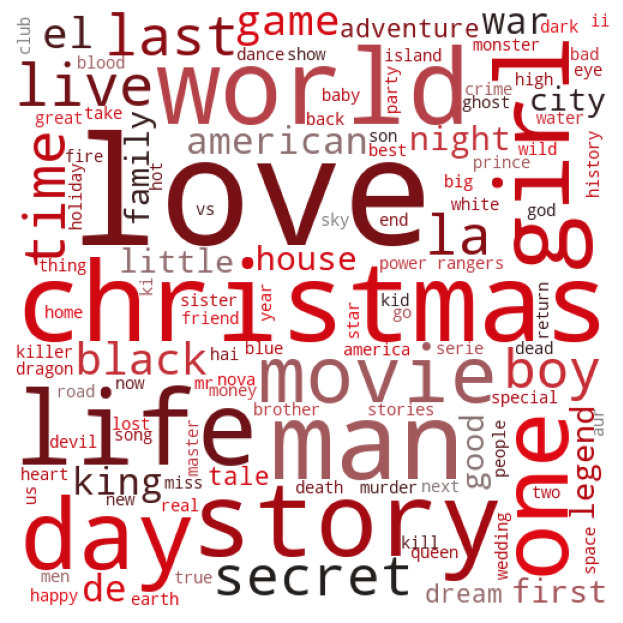

In [198]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 

for word in train_df.title:
    words = word.split(',')
    for i in words:
        token = i.lower()
        comment_words += "".join(token) + ' '

colors = ['#221f1f', '#b20710', '#e50914','grey']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white',
                stopwords = stopwords, colormap = colormap,
                min_font_size = 10).generate(comment_words) 

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Most common TV show genre is Kids TV shows

##**Country**

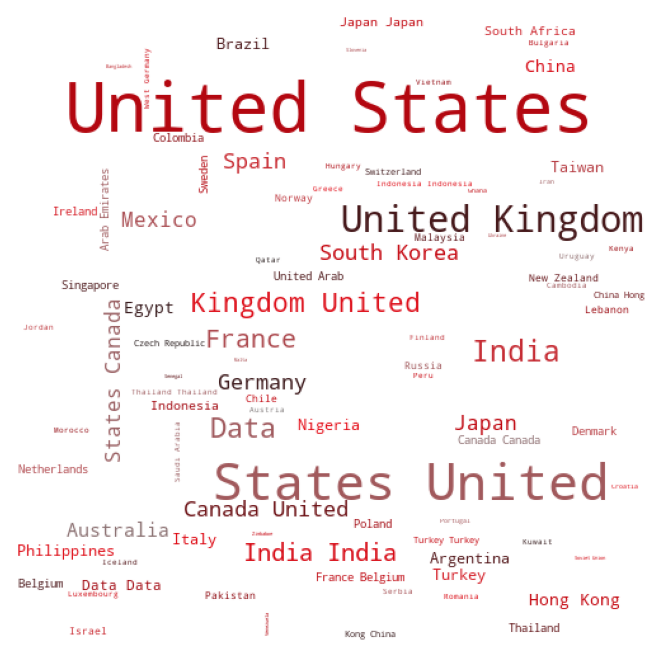

In [211]:

colors = ['#221f1f', '#b20710', '#e50914','grey']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)
wordcloud = WordCloud(
                          background_color='white',
                          width=500,
                          height=500,
                      colormap = colormap,
                         ).generate(" ".join(train_df.country))

mpl.rcParams['figure.dpi'] = 120

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##**Cast**

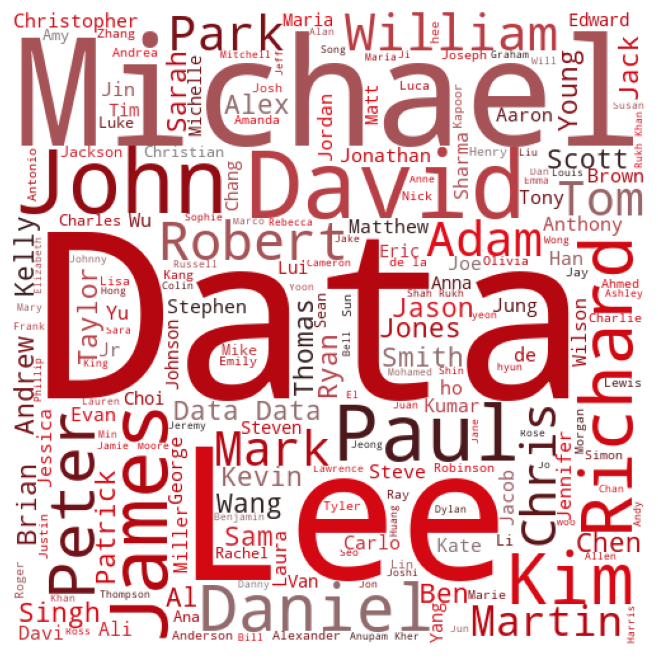

In [210]:
colors = ['#221f1f', '#b20710', '#e50914','grey']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)
wordcloud = WordCloud(
                          background_color='white',
                          width=500,
                          height=500,
                      colormap = colormap,
                         ).generate(" ".join(train_df.cast))

mpl.rcParams['figure.dpi'] = 120

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##**Director**

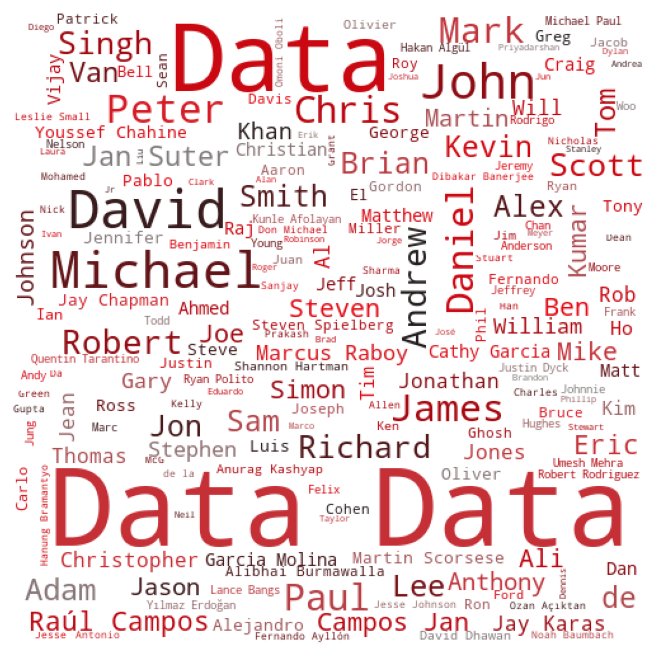

In [212]:
colors = ['#221f1f', '#b20710', '#e50914','grey']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)
wordcloud = WordCloud(
                          background_color='white',
                          width=500,
                          height=500,
                      colormap = colormap,
                         ).generate(" ".join(train_df.director))

mpl.rcParams['figure.dpi'] = 120

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Hypothesis Testing to check is there is any relation between year_added and type:

Null Hypothesis: year_added has no impact on type of content that gets added to the platform.

Alternative Hypothesis: year_added has impact on type of content that gets added to the platform.

Set significance level to 0.05.

In [213]:
hypo_data = pd.crosstab(train_df['type'], train_df['year_added'], margins=False)
hypo_data

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,256,861,1255,1497,1312,88
TV Show,1,0,0,0,0,5,6,30,184,361,429,656,697,29


In [214]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

7.478336952750899e-11